In [1]:
from data import BaostockDataWorker, DATABASE
DATABASE_PATH = os.getcwd()     # 解决方法
print("----database:"+DATABASE_PATH +"/"+ DATABASE + "----")
dw = BaostockDataWorker()


Working in /Users/yin/Library/CloudStorage/OneDrive-Personal/2.doing/bandwagon
login success!
----database:/Users/yin/Library/CloudStorage/OneDrive-Personal/2.doing/bandwagon/stock.db----
login success!


In [12]:
# t = dw.all_tickers[dw.all_tickers.type == 1 & dw.all_tickers.status == 1].sample(1).iloc[0].code
t = dw.all_tickers
t[t.type == "1"]

,code,code_name,ipoDate,outDate,type,status
1348,sh.600000,浦发银行,1999-11-10,,1,1
1349,sh.600001,邯郸钢铁,1998-01-22,2009-12-29,1,0
1350,sh.600002,齐鲁石化,1998-04-08,2006-04-24,1,0
1351,sh.600003,ST东北高,1999-08-10,2010-02-26,1,0
1352,sh.600004,白云机场,2003-04-28,,1,1
...,...,...,...,...,...,...
6725,sz.301321,翰博高新,2022-08-18,,1,1
6726,sz.301330,熵基科技,2022-08-17,,1,1
6727,sz.301333,诺思格,2022-08-02,,1,1
6728,sz.301336,趣睡科技,2022-08-12,,1,1


In [14]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取行业分类数据
rs = bs.query_stock_industry()
# rs = bs.query_stock_basic(code_name="浦发银行")
print('query_stock_industry error_code:'+rs.error_code)
print('query_stock_industry respond  error_msg:'+rs.error_msg)

# 打印结果集
industry_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    industry_list.append(rs.get_row_data())
result = pd.DataFrame(industry_list, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:/stock_industry.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_stock_industry error_code:0
query_stock_industry respond  error_msg:success
      updateDate       code code_name industry industryClassification
0     2022-08-01  sh.600000      浦发银行       银行                 申万一级行业
1     2022-08-01  sh.600001      邯郸钢铁                          申万一级行业
2     2022-08-01  sh.600002      齐鲁石化                          申万一级行业
3     2022-08-01  sh.600003     ST东北高                          申万一级行业
4     2022-08-01  sh.600004      白云机场     交通运输                 申万一级行业
...          ...        ...       ...      ...                    ...
4925  2022-08-01  sz.301289      国缆检测                          申万一级行业
4926  2022-08-01  sz.301298      东利机械                          申万一级行业
4927  2022-08-01  sz.301302      华如科技                          申万一级行业
4928  2022-08-01  sz.301306      西测测试                          申万一级行业
4929  2022-08-01  sz.301312       智立方                          申万一级行业

[4

In [15]:
result

,updateDate,code,code_name,industry,industryClassification
0,2022-08-01,sh.600000,浦发银行,银行,申万一级行业
1,2022-08-01,sh.600001,邯郸钢铁,,申万一级行业
2,2022-08-01,sh.600002,齐鲁石化,,申万一级行业
3,2022-08-01,sh.600003,ST东北高,,申万一级行业
4,2022-08-01,sh.600004,白云机场,交通运输,申万一级行业
...,...,...,...,...,...
4925,2022-08-01,sz.301289,国缆检测,,申万一级行业
4926,2022-08-01,sz.301298,东利机械,,申万一级行业
4927,2022-08-01,sz.301302,华如科技,,申万一级行业
4928,2022-08-01,sz.301306,西测测试,,申万一级行业


In [1]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000032",
    "date,code,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

df = rs.get_data()

#### 登出系统 ####
bs.logout()
df

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


,date,code,open,high,low,close,volume,amount,adjustflag
0,2017-07-03,sh.000032,1587.0440,1605.1050,1585.0800,1604.3450,618638704,4389029888.0000,3
1,2017-07-04,sh.000032,1601.9850,1610.6520,1599.1580,1604.5470,669748208,4653228800.0000,3
2,2017-07-05,sh.000032,1609.6960,1620.7880,1605.8210,1617.9030,686401008,5055446272.0000,3
3,2017-07-06,sh.000032,1623.1880,1637.2260,1617.4250,1630.5480,972281600,7437236224.0000,3
4,2017-07-07,sh.000032,1624.8530,1647.2900,1619.7300,1644.4660,897491696,6954533376.0000,3
...,...,...,...,...,...,...,...,...,...
120,2017-12-25,sh.000032,1653.7830,1653.7830,1638.0490,1638.8060,864797104,7012241664.0000,3
121,2017-12-26,sh.000032,1637.2440,1648.0420,1626.9080,1646.3150,718444208,5761362176.0000,3
122,2017-12-27,sh.000032,1646.1440,1678.6640,1645.8980,1656.5420,1208642000,10089702912.0000,3
123,2017-12-28,sh.000032,1650.8540,1678.0320,1644.5060,1671.7170,1122464896,9516788992.0000,3


In [2]:
df[['open',	'high',	'low',	'close','volume','amount']] = df[['open',	'high',	'low',	'close','volume','amount']].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        125 non-null    object 
 1   code        125 non-null    object 
 2   open        125 non-null    float64
 3   high        125 non-null    float64
 4   low         125 non-null    float64
 5   close       125 non-null    float64
 6   volume      125 non-null    float64
 7   amount      125 non-null    float64
 8   adjustflag  125 non-null    object 
dtypes: float64(6), object(3)
memory usage: 8.9+ KB


In [3]:
from stockstats import StockDataFrame, wrap
# sdf = StockDataFrame(df.copy())
sdf = wrap(df.copy())
sdf[['close_5_ema', 'close_10_ema','rsi']]
sdf['rsi']
# sdf['change']

date
2017-07-03           NaN
2017-07-04    100.000000
2017-07-05    100.000000
2017-07-06    100.000000
2017-07-07    100.000000
                 ...    
2017-12-25     51.360837
2017-12-26     53.587882
2017-12-27     56.508648
2017-12-28     60.482568
2017-12-29     57.453343
Name: rsi, Length: 125, dtype: float64

In [4]:
# sdf.resample('D', on = sdf.index)
sdf = sdf.reset_index() 
sdf

,date,code,open,high,low,close,volume,amount,adjustflag,close_5_ema,close_10_ema,rs_14,rsi
0,2017-07-03,sh.000032,1587.044,1605.105,1585.080,1604.345,6.186387e+08,4.389030e+09,3,1604.345000,1604.345000,NaN,NaN
1,2017-07-04,sh.000032,1601.985,1610.652,1599.158,1604.547,6.697482e+08,4.653229e+09,3,1604.466200,1604.456100,inf,100.000000
2,2017-07-05,sh.000032,1609.696,1620.788,1605.821,1617.903,6.864010e+08,5.055446e+09,3,1610.831000,1609.861664,inf,100.000000
3,2017-07-06,sh.000032,1623.188,1637.226,1617.425,1630.548,9.722816e+08,7.437236e+09,3,1619.021138,1616.676890,inf,100.000000
4,2017-07-07,sh.000032,1624.853,1647.290,1619.730,1644.466,8.974917e+08,6.954533e+09,3,1628.789071,1624.654388,inf,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2017-12-25,sh.000032,1653.783,1653.783,1638.049,1638.806,8.647971e+08,7.012242e+09,3,1635.878281,1631.157254,1.055956,51.360837
121,2017-12-26,sh.000032,1637.244,1648.042,1626.908,1646.315,7.184442e+08,5.761362e+09,3,1639.357188,1633.913208,1.154610,53.587882
122,2017-12-27,sh.000032,1646.144,1678.664,1645.898,1656.542,1.208642e+09,1.008970e+10,3,1645.085458,1638.027534,1.299308,56.508648
123,2017-12-28,sh.000032,1650.854,1678.032,1644.506,1671.717,1.122465e+09,9.516789e+09,3,1653.962639,1644.152891,1.530529,60.482568


In [5]:
sdf['date'] = sdf.date.apply(pd.to_datetime)
sdf

,date,code,open,high,low,close,volume,amount,adjustflag,close_5_ema,close_10_ema,rs_14,rsi
0,2017-07-03,sh.000032,1587.044,1605.105,1585.080,1604.345,6.186387e+08,4.389030e+09,3,1604.345000,1604.345000,NaN,NaN
1,2017-07-04,sh.000032,1601.985,1610.652,1599.158,1604.547,6.697482e+08,4.653229e+09,3,1604.466200,1604.456100,inf,100.000000
2,2017-07-05,sh.000032,1609.696,1620.788,1605.821,1617.903,6.864010e+08,5.055446e+09,3,1610.831000,1609.861664,inf,100.000000
3,2017-07-06,sh.000032,1623.188,1637.226,1617.425,1630.548,9.722816e+08,7.437236e+09,3,1619.021138,1616.676890,inf,100.000000
4,2017-07-07,sh.000032,1624.853,1647.290,1619.730,1644.466,8.974917e+08,6.954533e+09,3,1628.789071,1624.654388,inf,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2017-12-25,sh.000032,1653.783,1653.783,1638.049,1638.806,8.647971e+08,7.012242e+09,3,1635.878281,1631.157254,1.055956,51.360837
121,2017-12-26,sh.000032,1637.244,1648.042,1626.908,1646.315,7.184442e+08,5.761362e+09,3,1639.357188,1633.913208,1.154610,53.587882
122,2017-12-27,sh.000032,1646.144,1678.664,1645.898,1656.542,1.208642e+09,1.008970e+10,3,1645.085458,1638.027534,1.299308,56.508648
123,2017-12-28,sh.000032,1650.854,1678.032,1644.506,1671.717,1.122465e+09,9.516789e+09,3,1653.962639,1644.152891,1.530529,60.482568


In [56]:
df.iloc[-1,['close']].to_dict() 

KeyError: -1

In [6]:
sdf.resample("D", on= "date").mean()


,open,high,low,close,volume,amount,close_5_ema,close_10_ema,rs_14,rsi
date,,,,,,,,,,
2017-07-03,1587.044,1605.105,1585.080,1604.345,6.186387e+08,4.389030e+09,1604.345000,1604.345000,NaN,NaN
2017-07-04,1601.985,1610.652,1599.158,1604.547,6.697482e+08,4.653229e+09,1604.466200,1604.456100,inf,100.000000
2017-07-05,1609.696,1620.788,1605.821,1617.903,6.864010e+08,5.055446e+09,1610.831000,1609.861664,inf,100.000000
2017-07-06,1623.188,1637.226,1617.425,1630.548,9.722816e+08,7.437236e+09,1619.021138,1616.676890,inf,100.000000
2017-07-07,1624.853,1647.290,1619.730,1644.466,8.974917e+08,6.954533e+09,1628.789071,1624.654388,inf,100.000000
...,...,...,...,...,...,...,...,...,...,...
2017-12-25,1653.783,1653.783,1638.049,1638.806,8.647971e+08,7.012242e+09,1635.878281,1631.157254,1.055956,51.360837
2017-12-26,1637.244,1648.042,1626.908,1646.315,7.184442e+08,5.761362e+09,1639.357188,1633.913208,1.154610,53.587882
2017-12-27,1646.144,1678.664,1645.898,1656.542,1.208642e+09,1.008970e+10,1645.085458,1638.027534,1.299308,56.508648


In [9]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d.%W.")

'2023-01-28.04.'

In [ ]:
rs_ = rs[OLHCVA].pct_change().dropna()

In [ ]:
rs_.describe()

In [ ]:
rs_[['volume','amount']] = rs_[['volume','amount']].applymap(sigmoid_)

In [ ]:
sns.pairplot(rs_)

In [ ]:
import seaborn as sns
sns.factorplot(rs_.sample(100))

In [ ]:
dots = sns.load_dataset("dots")
sns.kdeplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

dots

In [ ]:
from unicodedata import category
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
sns.pairplot(data=penguins, hue="species")

In [ ]:
pt = PowerTransformer(method='box-cox', standardize=False)
X_pt = pt.fit_transform(X)                   
sns.displot(X_pt, kde=True)

In [ ]:
df = pd.DataFrame({'A':np.array([1,np.nan,2,3,6,np.nan]),
                 'B':np.array([np.nan,4,np.nan,5,9,np.nan]),
                  'C':'foo'})
df.isna()                  

In [ ]:
x = np.array([0,1,3])
y = np.array([0,1,5])
a1=len(x)*((x*y).sum())-x.sum()*y.sum()
a2=len(x)*((x**2).sum())-(x.sum())**2
a=a1/a2
b=y.mean()-a*(x.mean())
print(a,b)

In [ ]:
# 第二种解法： a = np.cov(x,y)/ x.var(), b = (y - a*x).mean() 
a = ((x*y).mean() - x.mean()*y.mean())/x.var()
b = (y - a*x).mean() 
print(a,b)


covar = lambda x,y: ((x*y).mean() - x.mean()*y.mean())

covar(x,y)/covar(x,x)

In [ ]:
# 用np.cov(), np.var() 要注意是总体还是样本，总体的时候分母是n，样本时分母是n-1
np.cov(x,y)[1,0]*2/3 , covar(x,y)
covar(x,x) , x.var()


In [ ]:
#首先我们先建立一个数据集，这也是之后用来训练和测试的数据
#导入包，创建数据集
import pandas as pd
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
exam=pd.DataFrame(examDict)
#看看数据集长什么样
exam.head()

In [ ]:
import numpy as np

### EM算法过程函数定义
def em(data, thetas, max_iter=30, eps=1e-3):
    '''
    输入：
    data：观测数据
    thetas：初始化的估计参数值
    max_iter：最大迭代次数
    eps：收敛阈值
    输出：
    thetas：估计参数
    '''
    # 初始化似然函数值
    ll_old = -np.infty
    for i in range(max_iter):
        ### E步：求隐变量分布
        # 对数似然 [coin_num, exp_num], [2, 5]
        log_like = np.array([np.sum(data * np.log(theta), axis=1) for theta in thetas])
        # 似然 [coin_num, exp_num], [2, 5]
        like = np.exp(log_like)
        # 求隐变量分布 [coin_num, exp_num], [2, 5]  Q_i
        ws = like/like.sum(0)
        # 概率加权 [2, 5, 2]
        vs = np.array([w[:, None] * data for w in ws])
        ### M步：更新参数值 [2, 2]  [[A_+,A_-],[B_+,B_-]]
        thetas = np.array([v.sum(0)/v.sum() for v in vs])
        # 更新似然函数
        ll_new = np.sum([w*l for w, l in zip(ws, log_like)])  # 计算似然函数 \hat(theta):=\arg,\max_{\theta}\sum_{i=1}^m\sum_{z^{(i)}Q_i(z^{(i)})\log{P(x_i,z^{(i)}|\theta)}}
        print("Iteration: %d" % (i+1))
        print("theta_B = %.2f, theta_C = %.2f, ll = %.2f"
              % (thetas[0,0], thetas[1, 0], ll_new))
        # 满足迭代条件即退出迭代
        if np.abs(ll_new - ll_old) < eps:
            break
        ll_old = ll_new
    return thetas


if __name__ == "__main__":
    # 观测数据，5次独立试验，每次试验10次抛掷的正反次数
    # 比如第一次试验为5次正面5次反面
    observed_data = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
    # 初始化参数值，即硬币B的正面概率为0.6，硬币C的正面概率为0.5
    thetas = np.array([[0.6, 0.4], [0.5, 0.5]])
    # thetas = em(observed_data, thetas, max_iter=30, eps=1e-3)
    thetas = em(observed_data, thetas) #, max_iter=30, eps=1e-4)
    print(thetas)


In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,time,code,name,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-07-31',
    frequency="5", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
# result.to_csv("D:\\history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

In [121]:
import pandas as pd
df = pd.read_excel("000016closeweight.xls",header = 0)
df

,code,name,weight,sector
0,600900,长江电力,3.710,sh.000032
1,600010,包钢股份,0.697,sz.399440


In [ ]:
df.iloc[0]

In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:/sz50_stocks.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

In [ ]:
result

In [ ]:
import numpy as np
x = np.linspace(0,10,100)
y = np.sin(x)
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc("font",family='Heiti TC')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(x,y)
plt.hlines(0,0,10)
plt.text(0,0.5,"上缩")
plt.text(2,0.5,"下放")
plt.text(3,-0.5,"下缩")
plt.text(5,-0.5,"上放")
plt.text(6,0.5,"上缩")
plt.text(8,0.5,"下放")

In [ ]:
def market_of(ticker:str) -> str:
        '''根据股票代码，返回其所在的大盘指数代码
        http://baostock.com/baostock/index.php/指数数据
        综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
        规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
        注意指数没有分钟线数据... ...怎么办？
        ie. 'sh.000023' goes to 'sh.000001' # 上证综指 
            'sz.300333' goes to 'sz.399106' # 深圳综指
            'hk.00700' goes to 'HSI'        # 恒生指数
            'us.######' goes to 'NASDAQ' or 'DJX' 
        '''
        market = ticker.split(".")[0]
        # match market:   # requires python 3.10 or higher version
        #     case 'sh': 'sh.000001'
        #     case 'sz':  'sz.399106'
        #     case 'hk':  'HSI'
        #     case 'us':  'DJX'
        if market == 'sh': mkt = 'sh.000001'
        elif market == 'sz': mkt = 'sz.399106'
        elif market == 'hk': mkt = 'HSI'
        else: print("invalid market label")

        return mkt 

def market(ticker:str)->str:
    return "sh.000001"

In [ ]:
df['code'] = df.code.astype("str")


In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取行业分类数据
rs = bs.query_stock_basic()
# rs = bs.query_stock_basic(code_name="浦发银行")
print('query_stock_industry error_code:'+rs.error_code)
print('query_stock_industry respond  error_msg:'+rs.error_msg)

industries = pd.DataFrame(rs.get_data(), columns=rs.fields)
# 登出系统
bs.logout()


login success!
login respond error_code:0
login respond  error_msg:success
query_stock_industry error_code:0
query_stock_industry respond  error_msg:success
logout success!


In [ ]:
industries

,code,code_name,ipoDate,outDate,type,status
0,of.159001,易方达保证金货币A,2013-03-29,,5,1
1,of.159003,招商保证金快线A,2013-05-17,,5,1
2,of.159005,汇添富收益快钱货币A,2014-12-23,,5,1
3,of.159601,华夏MSCI中国A50互联互通ETF,2021-11-01,,5,1
4,of.159602,南方MSCI中国A50互联互通ETF,2021-10-29,,5,1
...,...,...,...,...,...,...
7092,sz.399994,中证信息安全主题指数,2015-03-12,,2,1
7093,sz.399995,中证基建工程指数,2015-03-12,,2,1
7094,sz.399996,中证智能家居指数,2014-09-17,,2,1
7095,sz.399997,中证白酒指数,2015-01-21,,2,1


In [ ]:
d = pd.DataFrame(industries.industry.value_counts())
d

,industry
机械设备,473
,429
化工,428
医药生物,403
电子,341
计算机,273
电气设备,245
汽车,214
公用事业,204
传媒,172


In [ ]:
criteria = lambda r:1 if r.ma5>r.ma10 else -1
stock_list = pd.DataFrame()
stock_list['stock_strength'] = [df.apply(criteria, axis=1) for df in f]

In [115]:
# %run bandwagon.py

df = pd.read_excel("000016closeweight.xls", dtype={'code':'str'}, header = 0)
df

,code,name,weight,sector
0,600900,长江电力,3.710,sh.000032
1,600010,包钢股份,0.697,sz.399440


In [184]:
import baostock as bs
bs.login()
rs = bs.query_trade_dates(start_date="2017-01-01", end_date=datetime.today().strftime("%Y-%m-%d"))
print('query_trade_dates respond error_code:'+rs.error_code)
print('query_trade_dates respond  error_msg:'+rs.error_msg)
trade_day = rs.get_data()
trade_day

login success!
query_trade_dates respond error_code:0
query_trade_dates respond  error_msg:success


,calendar_date,is_trading_day
0,2017-01-01,0
1,2017-01-02,0
2,2017-01-03,1
3,2017-01-04,1
4,2017-01-05,1
...,...,...
2215,2023-01-25,0
2216,2023-01-26,0
2217,2023-01-27,0
2218,2023-01-28,0


In [186]:
trade_day.calendar_date.apply(pd.to_datetime).dt.day_of_week

0       6
1       0
2       1
3       2
4       3
       ..
2215    2
2216    3
2217    4
2218    5
2219    6
Name: calendar_date, Length: 2220, dtype: int64

In [139]:


# td.calendar_date.max()
# td.calendar_date.tail(20)
import pandas as pd
# td[:,'calendar_date'] = td.calendar_date.apply(pd.to_datetime)


trade_day['is_trading_day'] = trade_day.is_trading_day.astype("int64")
trade_day['calendar_date'] = pd.to_datetime(trade_day.calendar_date)
trade_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   calendar_date   2220 non-null   datetime64[ns]
 1   is_trading_day  2220 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.8 KB


In [1]:
import pandas as pd

from bandwagon import Bandwagon
if __name__ == "__main__":
    df = pd.read_excel("000016closeweight.xls", dtype={'code':'str'}, header = 0)
    df['code'] = 'sh.'+df.code
    # df = pd.read_excel("000016closeweight(5).xls", dtype={'code':'str'}, header = 0)
    bw = Bandwagon(df)
    score = bw.vote()
    print(f"score = {score}, Buy(1) or Sell(-1)?", bw.etf_action(score))
    print(bw.stock_list)
    print(bw.stocks_datum)

    bw.save()

Working in /Users/yin/Library/CloudStorage/OneDrive-Personal/2.doing/bandwagon
login success!
login success!
score = nan, Buy(1) or Sell(-1)? 0
        code  name  weight     sector     market  stock_strength  \
0  sh.600900  长江电力   3.710  sh.000032  sh.000001               1   
1  sh.600010  包钢股份   0.697  sz.399440  sh.000001               1   

   sector_strength  market_strength  stock_momentum  strength  
0                1                1             NaN       NaN  
1                1                1             NaN       NaN  
[         date     ticker   open   high    low  close       preclose  \
1  2022-11-02  sh.600900  20.30  20.52  20.05  20.46  20.3200000000   
2  2022-11-03  sh.600900  20.35  20.37  19.89  19.98  20.4600000000   
3  2022-11-04  sh.600900  19.86  20.27  19.75  20.14  19.9800000000   
4  2022-11-07  sh.600900  20.05  20.23  19.97  20.14  20.1400000000   
5  2022-11-08  sh.600900  20.17  20.34  19.95  20.05  20.1400000000   
6  2022-11-09  sh.600900  20.07 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

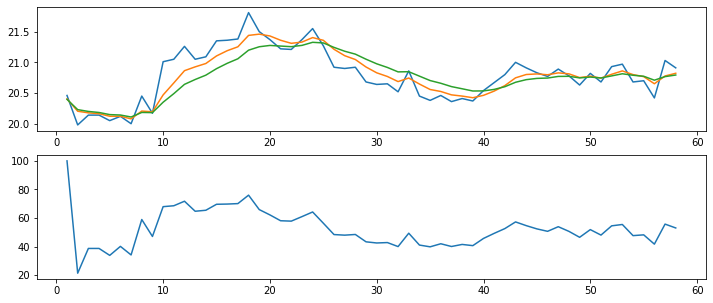

In [32]:
r = bw.stocks_datum[0] # .resample("D",on="date")
# list(r)[0][1]
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,5)) 
# ax = plt.subplot(211) # 或plt.subplot(2,1,1)，对2行1列的第一个子图操作 (3)
ax, ax2 = axes
ax.plot(r.close)
ax.plot(r.close_5_ema)
ax.plot(r.close_10_ema)
# ax2 = plt.subplot(212)
ax2.plot(r.index, r.rsi)
ax.text(r.index, r.close, 'buy' if r.close_5_ema>r.close_10_ema and r.rsi>50 else 'sell')



In [3]:
def func(group):
    low = group.low.min()
    high = group.high.max()
    open = group.open.iloc[0]
    close = group.close.iloc[-1]
    volume = group.volume.sum()
    amount = group.amount.sum()
    return [low, high, open, close, volume, amount]

group = bw.stocks_datum[0].groupby("date")
# group.agg({'high':max, 'low':min})

# group.apply(func)

list(group)[2][1]




,date,ticker,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg,day,landmark,close_5_ema,close_10_ema,rsi
3,2022-11-04,sh.600900,19.86,20.27,19.75,20.14,19.9800000000,84883320.0,1.706199e+09,2,0.373200,0.800800,4,-,20.176923,20.199926,38.643068
